In [1]:
import os
import time,datetime
import logging, requests
import pandas as pd
import numpy as np
import sys
current_dir = os.getcwd()
sys.path.insert(1, os.path.abspath(os.path.join(current_dir, os.pardir)))
from etherscan import etherscan_api
import matplotlib.pyplot as plt
from functions import get_curve_exchangetx, get_curve_addtx, get_query

In [2]:
eth=etherscan_api.EtherscanConnector()
contract='0xbebc44782c7db0a1a60cb6fe97d0b483032ff1c7' # curve 3-pool
#contract = '0xc36442b4a4522e871399cd717abdd847ab11fe88' # uniswap v3 usdc-dai 0.05 add liquidity
txs = eth.get_normal_transactions(address=contract)

In [3]:
cur_add = get_curve_addtx(txs)

In [4]:
cur_ex = get_curve_exchangetx(txs)

In [5]:
uni_ex = get_query('DAI-USDC 500 10')
uni_add = get_query('DAI-USDC 500 10 addliq')

In [17]:
cur_ex['date']=cur_ex.index
cur_ex['date']=cur_ex['date'].apply(lambda x: x.date())
cur_add['date']=cur_add.index
cur_add['date']=cur_add['date'].apply(lambda x: x.date())
uni_add['date']=pd.to_datetime(uni_add.index)
uni_add['date']=uni_add['date'].apply(lambda x: x.date())
uni_add['amount'] = uni_add['LIQUIDITY_ADJUSTED']/1e3
uni_ex['date']=pd.to_datetime(uni_ex.index)
uni_ex['date']=uni_ex['date'].apply(lambda x: x.date())
uni_ex['AMOUNT0_USD_ABS'] = abs(uni_ex['AMOUNT0_USD'])

# comparing swap tx size distribution curve.3pool and Uniswap v3 DAI-USDC 0.05%

<AxesSubplot:>

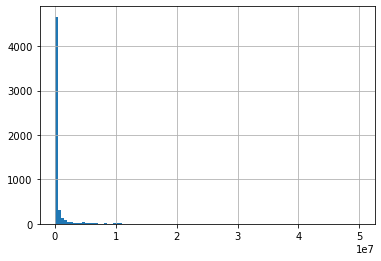

In [18]:
cur_ex['amount'].hist(bins=100)

<AxesSubplot:>

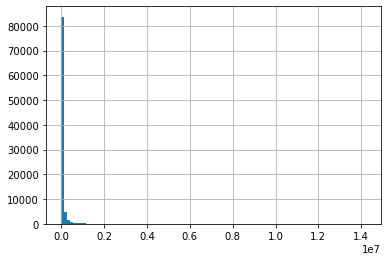

In [19]:
abs(uni_ex['AMOUNT0_USD']).hist(bins=100)

In [22]:
print('Curve 3pool tx size statistics:')
print()
print('average tx usd amount: ',cur_ex['amount'].mean())
print('10%ile tx usd amount: ',cur_ex['amount'].quantile(0.1))

Curve 3pool tx size statistics:

average tx usd amount:  594800.2445885413
10%ile tx usd amount:  1000.0


In [23]:
print('Uniswap v3 DAI-USDC 0.05% tx size statistics:')
print()
print('average tx usd amount: ',abs(uni_ex['AMOUNT0_USD']).mean())
print('10%ile tx usd amount: ',abs(uni_ex['AMOUNT0_USD']).quantile(0.1))

Uniswap v3 DAI-USDC 0.05% tx size statistics:

average tx usd amount:  64028.29599023794
10%ile tx usd amount:  394.10726865839985


In [24]:
txs_size = 1000

## the following two charts show Curve 3pool and Uniswap USDC-DAI pool's daily volume of txs < $1000

In [61]:
%matplotlib notebook
cur[cur['amount']<txs_size].groupby('date')['amount'].sum().plot()
plt.title('Curve 3pool exchange txs daily volume with txs<$1000')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'Curve 3pool exchange txs daily volume with txs<$1000')

<IPython.core.display.Javascript object>


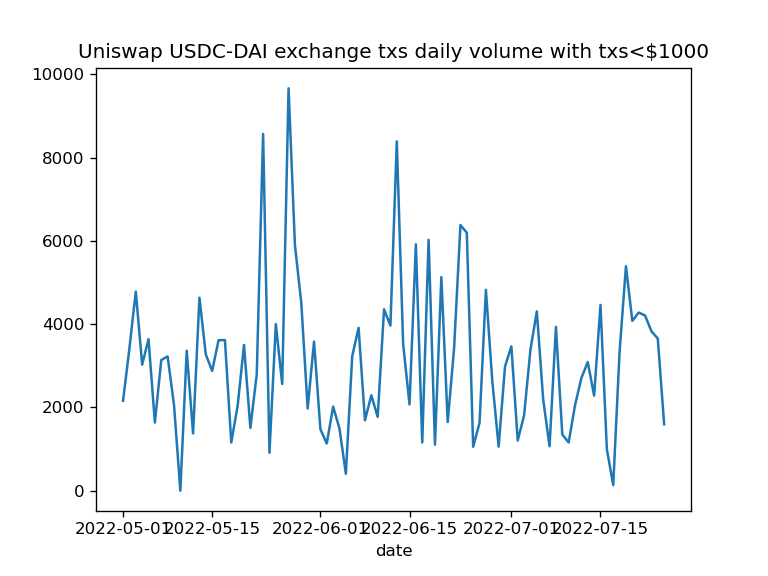

Text(0.5, 1.0, 'Uniswap USDC-DAI exchange txs daily volume with txs<$1000')

In [62]:
%matplotlib notebook
uni[uni['AMOUNT0_USD_ABS']<txs_size][str(cur.index[-1].date()):].groupby('date')['AMOUNT0_USD_ABS'].sum().plot()
plt.title('Uniswap USDC-DAI exchange txs daily volume with txs<$1000')

In [63]:
uni_=uni[uni['AMOUNT0_USD_ABS']<txs_size][str(cur.index[-1].date()):].groupby('date')['AMOUNT0_USD_ABS'].sum()

In [64]:
cur_=cur[cur['amount']<txs_size].groupby('date')['amount'].sum()

## the following chart shows volume difference between the pool for txs<1000

<IPython.core.display.Javascript object>


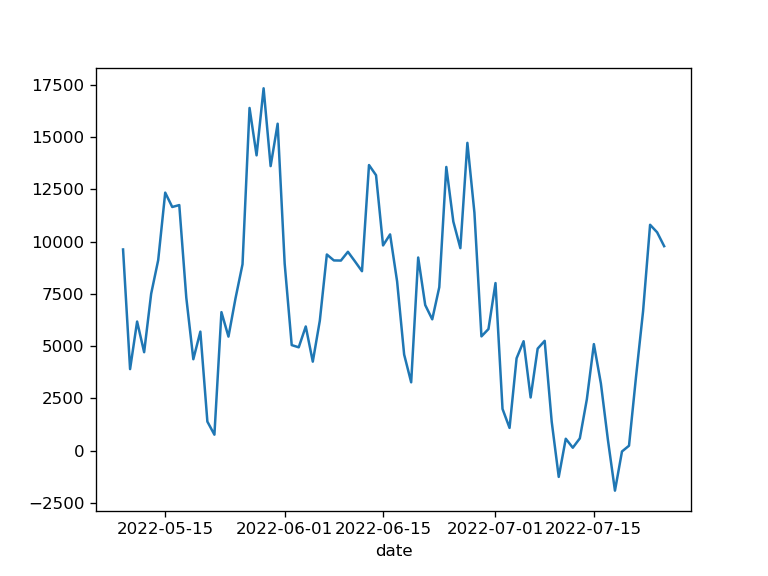

<AxesSubplot:xlabel='date'>

In [65]:
%matplotlib notebook
(uni_-cur_).rolling(5).sum().plot()

# comparing add liquidity tx size distribution curve.3pool and Uniswap v3 DAI-USDC 0.05%

<AxesSubplot:>

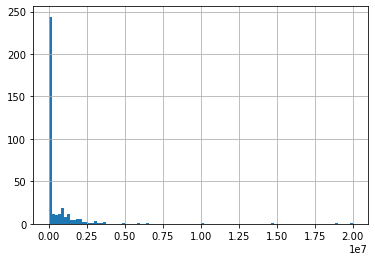

In [20]:
cur_add['amount'].hist(bins=100)

<AxesSubplot:>

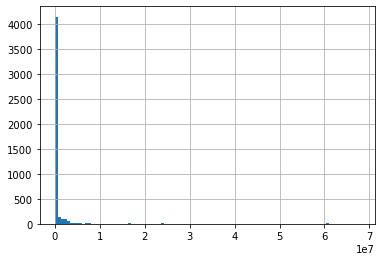

In [21]:
uni_add['amount'].hist(bins=100)

In [25]:
print('Curve 3pool tx size statistics:')
print()
print('average tx usd amount: ',cur_add['amount'].mean())
print('10%ile tx usd amount: ',cur_add['amount'].quantile(0.1))

Curve 3pool tx size statistics:

average tx usd amount:  617714.502262859
10%ile tx usd amount:  10.0


In [26]:


print('Uniswap v3 DAI-USDC 0.05% tx size statistics:')
print()
print('average tx usd amount: ',uni_add['amount'].mean())
print('10%ile tx usd amount: ',uni_add['amount'].quantile(0.1))

Uniswap v3 DAI-USDC 0.05% tx size statistics:

average tx usd amount:  563590.5747419437
10%ile tx usd amount:  0.0
